# 演習1の解答例

In [1]:
# Qiskitライブラリーを導入
from qiskit import *

# 数値計算モジュールを導入
import numpy as np

# 描画のためのライブラリーを導入
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Qiskitバージョンの確認
qiskit.__qiskit_version__

{'qiskit-terra': '0.13.0',
 'qiskit-aer': '0.5.1',
 'qiskit-ignis': '0.3.0',
 'qiskit-ibmq-provider': '0.7.0',
 'qiskit-aqua': None,
 'qiskit': '0.19.1'}

## 演習１- (1)

 1量子ビット回路で、初期値$|0\rangle$に対してY軸周りにπ/3の回転を操作して、状態ベクトルシミュレーターで計算し、状態をブロッホ球に表示させてください。<br>
Y軸周りの回転は`c.ry(回転角,量子ビット)`を使います。

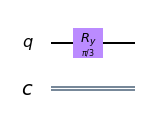

In [3]:
# 数値計算モジュールを導入
import numpy as np

q = QuantumCircuit(1,1)    # 1量子ビット回路を用意

q.ry(np.pi/3,0)    # y軸を中心にπ/3回転

q.draw(output="mpl")    # 回路を描画

In [4]:
# 状態ベクトルシミュレーターの実行
vector_sim = Aer.get_backend('statevector_simulator')
job = execute(q, vector_sim )
result = job.result().get_statevector(q, decimals=3)

print(result)

[0.866+0.j 0.5  +0.j]


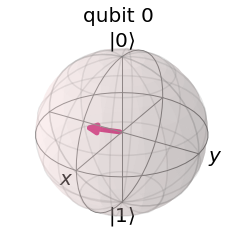

In [5]:
# ブロッホ球での表示
from qiskit.visualization import plot_bloch_multivector
plot_bloch_multivector(result)

## 演習１- (2)
2量子ビット回路で、$$\frac{1}{\sqrt{2}}|00\rangle + \frac{1}{\sqrt{2}}|11\rangle$$ のエンタングル状態を作り、QASMシミュレーターで実験して、測定結果をヒストグラムで表示してください。<br>
CNOTゲートを0番目の量子ビットを制御ビット、1番目の量子ビットを目標ビットで操作するには、
 `q.cx(0,1) `を使います。

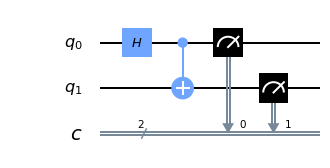

In [6]:
q = QuantumCircuit(2,2)    # 2量子ビット回路を用意

q.h(0)   # Hゲートを0番目の量子ビットに操作します。
q.cx(0,1)   # CNOTゲートを0番目を制御ビット、1番目を目標ビットとして操作します。

# 回路を測定
q.measure(0,0)
q.measure(1,1)

q.draw(output="mpl")    # 回路を描画

{'11': 526, '00': 498}


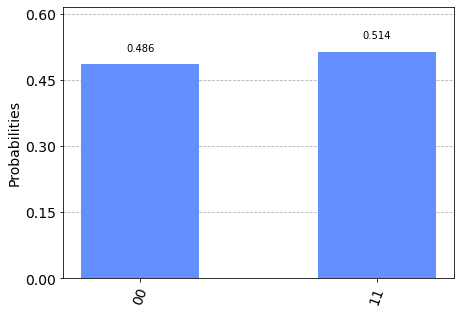

In [7]:
# QASMシミュレーターで実験
simulator = Aer.get_backend('qasm_simulator')
job = execute(q, backend=simulator, shots=1024)
result = job.result()

#  測定された回数を表示
counts = result.get_counts(q)
print(counts)

## ヒストグラムで測定された確率をプロット
from qiskit.visualization import *
plot_histogram( counts )

$|00\rangle$、$|11\rangle$の状態がほぼ50%ずつ均等に測定されました。